The aim of this notebook is to predict house prices based on almost eighty explanatory variables. In order to obtain a satisfactory result, the data is cleaned (outliers are removed) and the target variable undergoes logarithmic transformation. At the end, conclusions are drawn from the model and the variables with the greatest impact on house prices are found. 

The following notebook took part in 'Housing Prices Competition for Kaggle Learn Users' (https://www.kaggle.com/c/home-data-for-ml-course/overview).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploration-of-Data" data-toc-modified-id="Exploration-of-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploration of Data</a></span><ul class="toc-item"><li><span><a href="#Preliminary-observations" data-toc-modified-id="Preliminary-observations-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Preliminary observations</a></span></li><li><span><a href="#Exploring-numerical-columns" data-toc-modified-id="Exploring-numerical-columns-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Exploring numerical columns</a></span><ul class="toc-item"><li><span><a href="#Univariate-Analysis" data-toc-modified-id="Univariate-Analysis-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Univariate Analysis</a></span></li><li><span><a href="#Bivariate-Analysis" data-toc-modified-id="Bivariate-Analysis-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Bivariate Analysis</a></span></li><li><span><a href="#Assessing-correlations" data-toc-modified-id="Assessing-correlations-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Assessing correlations</a></span></li><li><span><a href="#Missing/null-values-in-numerical-columns" data-toc-modified-id="Missing/null-values-in-numerical-columns-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Missing/null values in numerical columns</a></span></li></ul></li><li><span><a href="#Exploring-categorical-columns" data-toc-modified-id="Exploring-categorical-columns-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploring categorical columns</a></span><ul class="toc-item"><li><span><a href="#Box-plots-of-SalePrice-vs-categorical-values." data-toc-modified-id="Box-plots-of-SalePrice-vs-categorical-values.-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Box plots of SalePrice vs categorical values.</a></span></li><li><span><a href="#Missing/null-values-in-categorical-columns" data-toc-modified-id="Missing/null-values-in-categorical-columns-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Missing/null values in categorical columns</a></span></li></ul></li></ul></li><li><span><a href="#Data-cleaning-&amp;-Preprocessing" data-toc-modified-id="Data-cleaning-&amp;-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data cleaning &amp; Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-missing/null-values" data-toc-modified-id="Dealing-with-missing/null-values-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dealing with missing/null values</a></span></li><li><span><a href="#Removing-outliers" data-toc-modified-id="Removing-outliers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Removing outliers</a></span></li><li><span><a href="#Transforming-data-to-reduce-skew" data-toc-modified-id="Transforming-data-to-reduce-skew-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Transforming data to reduce skew</a></span></li></ul></li><li><span><a href="#Feature-Selection-&amp;-Engineering" data-toc-modified-id="Feature-Selection-&amp;-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Selection &amp; Engineering</a></span></li><li><span><a href="#Preliminary-Assessment-of-Machine-Learning-Algorithms" data-toc-modified-id="Preliminary-Assessment-of-Machine-Learning-Algorithms-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preliminary Assessment of Machine Learning Algorithms</a></span><ul class="toc-item"><li><span><a href="#Cross-validation" data-toc-modified-id="Cross-validation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Cross-validation</a></span></li></ul></li><li><span><a href="#Selecting-of-Best-Algorithm(s)-&amp;-Fine-Tuning" data-toc-modified-id="Selecting-of-Best-Algorithm(s)-&amp;-Fine-Tuning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Selecting of Best Algorithm(s) &amp; Fine-Tuning</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Grid Search</a></span></li><li><span><a href="#Load-the-test-data" data-toc-modified-id="Load-the-test-data-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Load the test data</a></span></li><li><span><a href="#Repeat-pre-processing" data-toc-modified-id="Repeat-pre-processing-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Repeat pre-processing</a></span></li><li><span><a href="#Create-final-model" data-toc-modified-id="Create-final-model-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Create final model</a></span></li><li><span><a href="#Make-predictions-for-submission" data-toc-modified-id="Make-predictions-for-submission-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Make predictions for submission</a></span></li></ul></li><li><span><a href="#Interpretation" data-toc-modified-id="Interpretation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Interpretation</a></span></li></ul></div>

In [2]:
# core
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train_path = 'Input/train.csv'
train_df = pd.read_csv(train_path, index_col='Id')

## Exploration of Data

### Preliminary observations

In [4]:
train_df.shape

(1460, 80)

In [5]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# missing values
for col in train_df.columns:
    if sum(train_df[col].isnull()) > 0:
       print(col, sum(train_df[col].isnull()))

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


Let's see which data to use to create our model.

### Exploring numerical columns

I will look for the skewness of the SalePrice. In regression it is generally a good idea to decrease it to 
increase the accuracy (though it is not necessary for the Decission Tree and Random Forest).

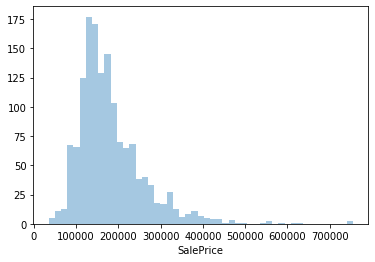

In [8]:
sns.distplot(train_df['SalePrice'], kde=False)

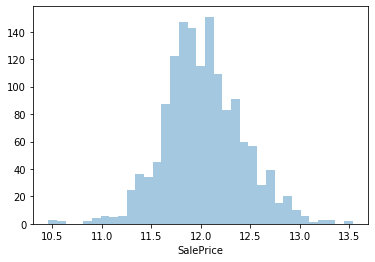

In [9]:
# let's see the logarithm of SalePrice
sns.distplot(np.log(train_df['SalePrice']), kde=False)

In [10]:
# the skewness
print('The skewness of SalePrice: ', train_df['SalePrice'].skew().round(2))
print('The skewness of log of SalePrice: ', np.log(train_df['SalePrice']).skew().round(2))

The skewness of SalePrice:  1.88
The skewness of log of SalePrice:  0.12


**Notes for Data Cleaning & Preprocessing:**
- perform log transformation on SalePrice
- check the skewness of the features.

#### Univariate Analysis 

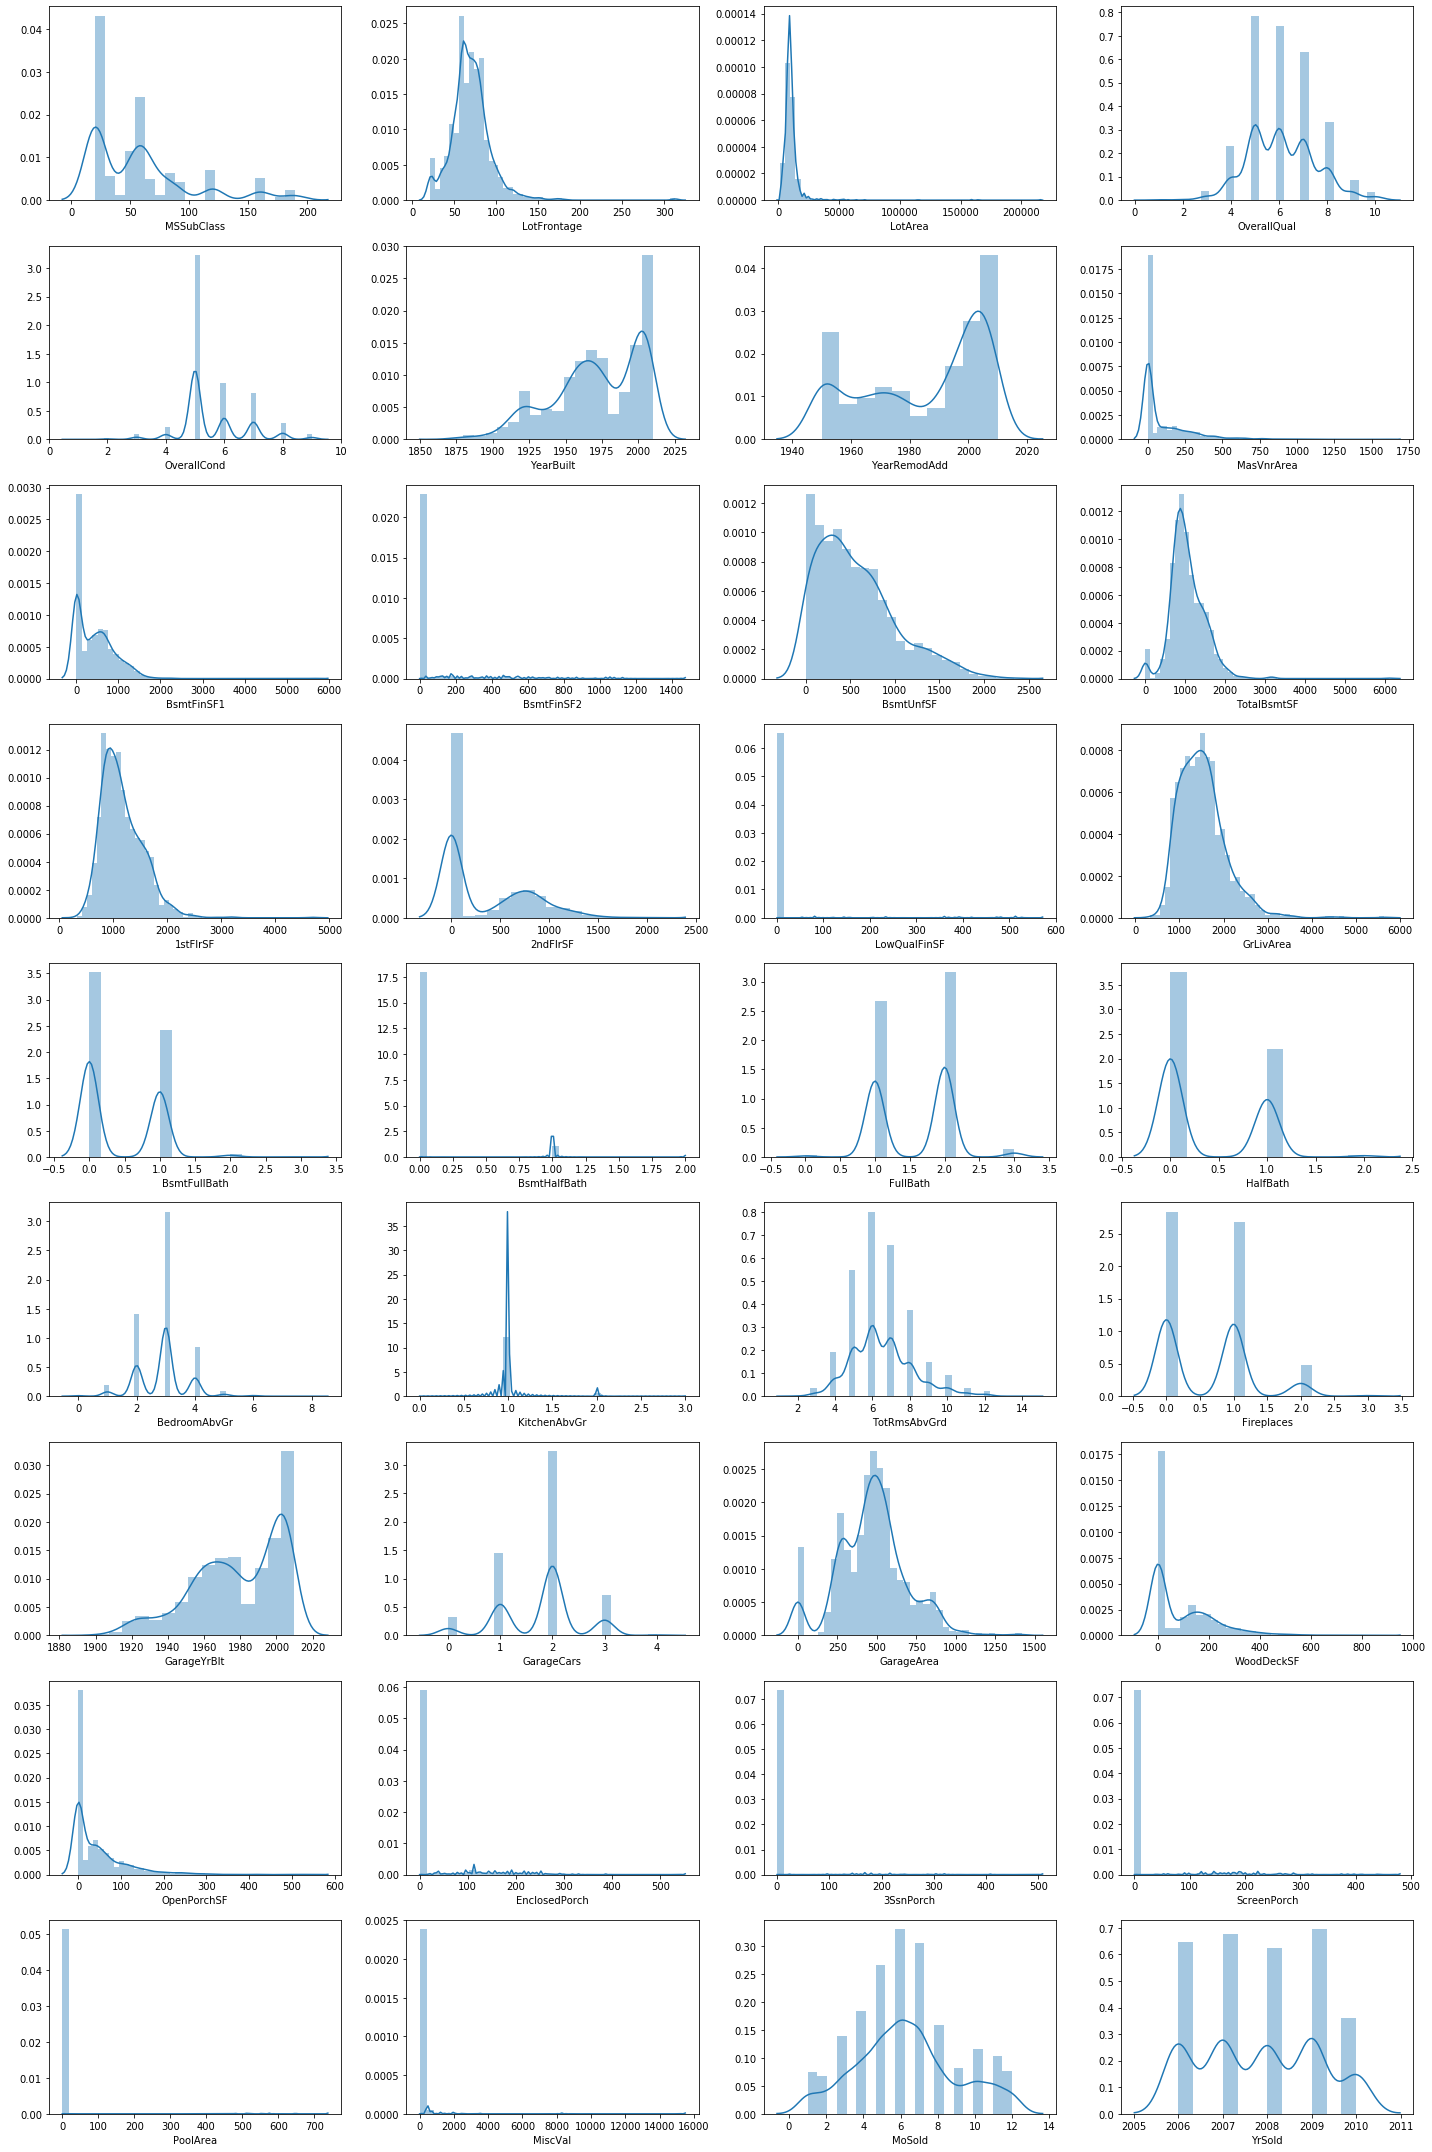

In [11]:
num_attributes = train_df.select_dtypes(exclude=['object']).drop(
    'SalePrice', axis=1)

fig = plt.figure(figsize=(20, 30))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.distplot(num_attributes.iloc[:, i].dropna())
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

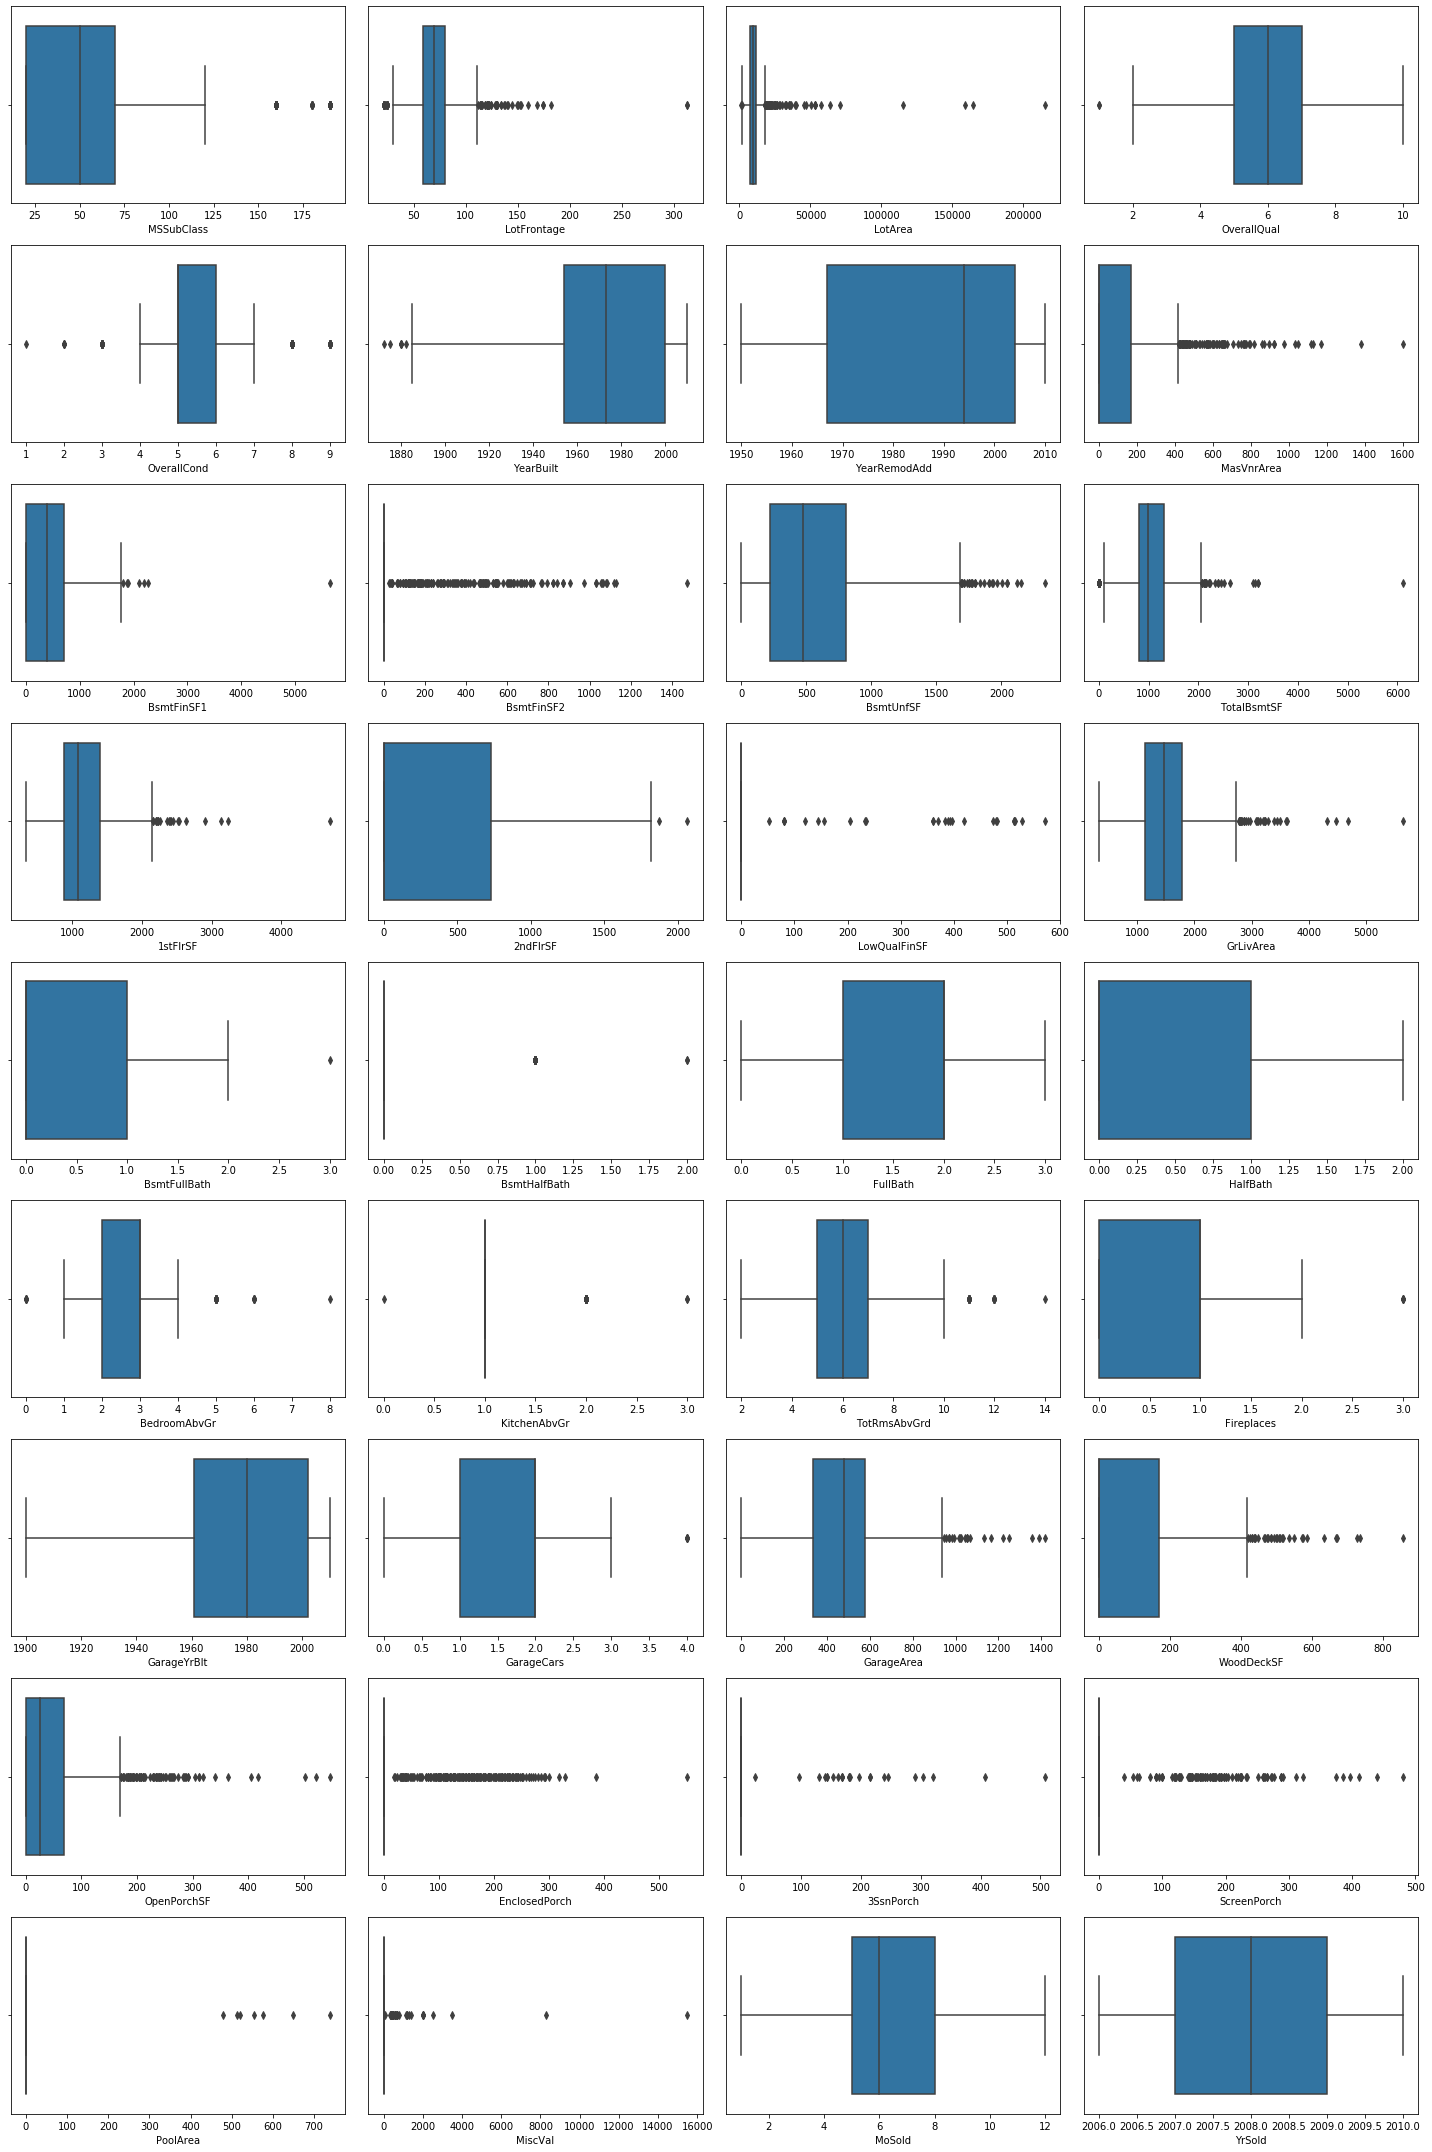

In [12]:
fig = plt.figure(figsize=(20, 30))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(num_attributes.iloc[:, i])
    
plt.tight_layout()
plt.show()

#### Bivariate Analysis

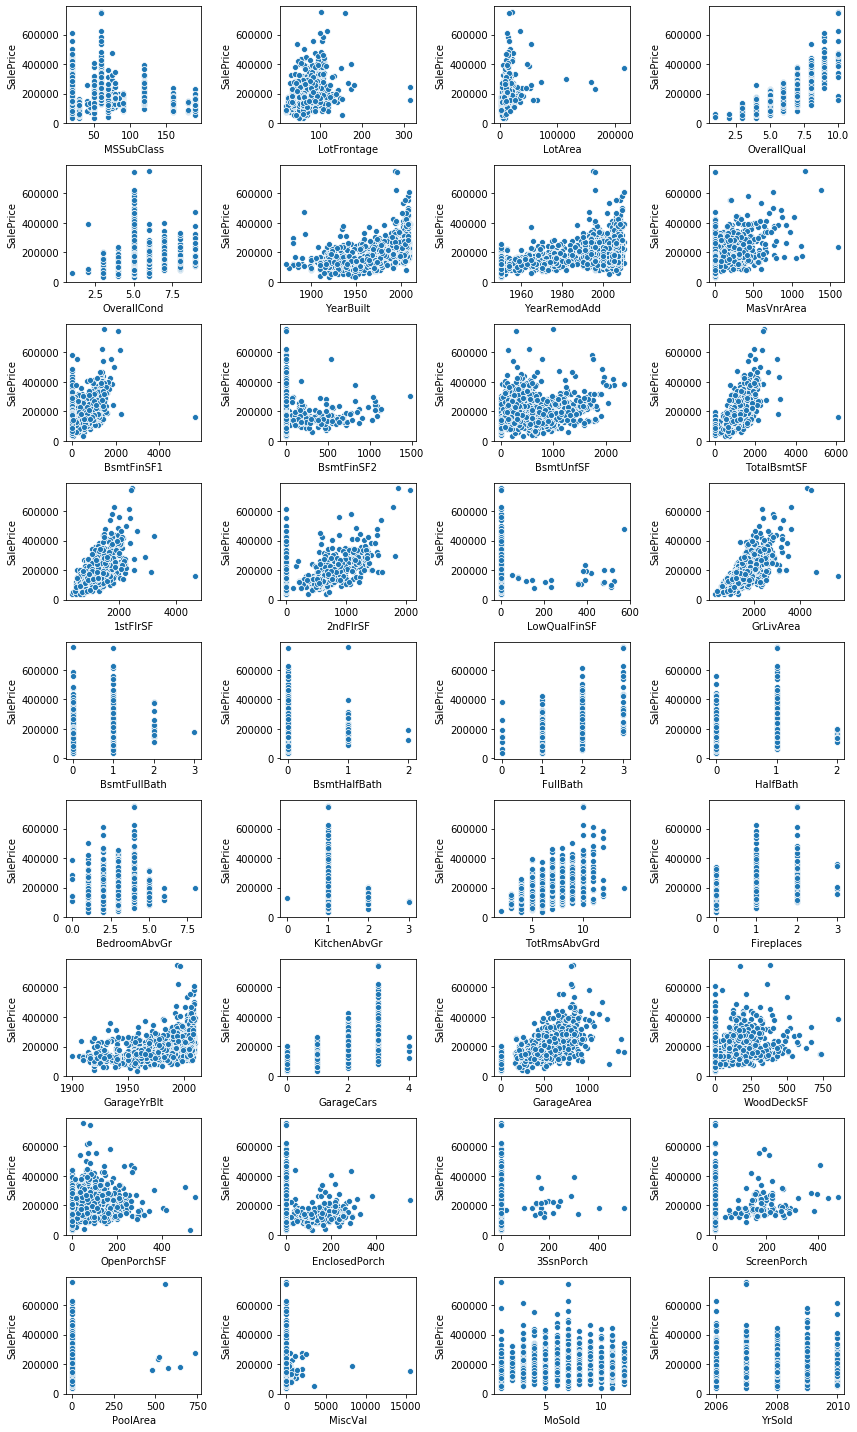

In [13]:
fig = plt.figure(figsize=(12, 20))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(num_attributes.iloc[:, i], train_df['SalePrice'])
    
plt.tight_layout()
plt.show()

**Notes for Data Cleaning & Preprocessing**
<br>Outliers found:
- LotFrontage > 300
- LotArea > 100000
- BsmtFinSF1 > 4000
- TotalBsmtSF > 6000
- 1stFirSF > 4000
- GrLivArea > 4000 and SalePrice < 4000


#### Assessing correlations

It is recommended to remove correlated values to improve the model's accuracy

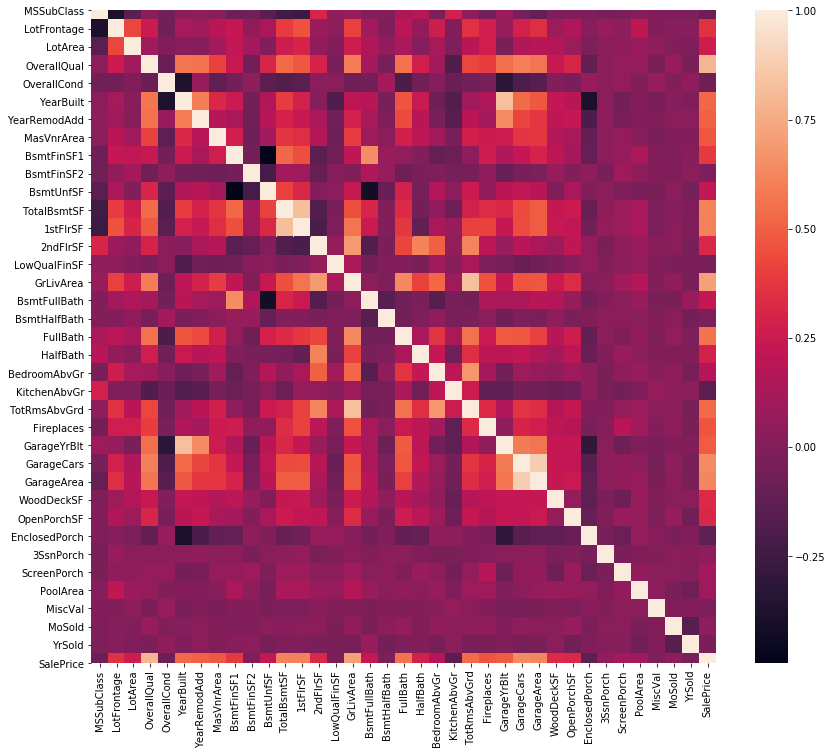

In [14]:
# counting the Pearson's correlation (linear)
correlation = train_df.corr()
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation)
plt.show()

In [15]:
# show the most closely correlated variables
biggest_correlation_variables = pd.Series()
correlation_variables_only = correlation.drop('SalePrice', axis=0).drop('SalePrice', axis=1)
for i in correlation_variables_only.index:
    for c in correlation_variables_only.columns:
        if c != i:
            if correlation_variables_only.loc[i, c] > 0.70:
                biggest_correlation_variables['{} - {}'.format(i, c)] = correlation_variables_only.loc[i, c]

biggest_correlation_variables.drop_duplicates().sort_values(ascending=False)

GarageCars - GarageArea     0.882475
YearBuilt - GarageYrBlt     0.825667
GrLivArea - TotRmsAbvGrd    0.825489
TotalBsmtSF - 1stFlrSF      0.819530
dtype: float64

In [16]:
correlation['SalePrice'].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64

**Note for Feature Selection & Engineering**
<br>These attributes may be correlated and it is advisable to:
- exclude GarageArea - correlated with GarageCars
- exclude 1stFlrSF - correlated with TotalBsmtSF
- exclude GarageYrBlt - correlated with YearBuilt
- exclude attributes lowly correlated with SalePrice and unclear non-linear correlation: MSSubClass, LowQualFinSF, MiscVal, MoSold, YrSold

#### Missing/null values in numerical columns

In [17]:
num_attributes.isnull().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
YrSold           0
BsmtFinSF2       0
dtype: int64

**Notes for Data Cleaning & Preprocessing:**
- not sure what to do with LotFrontage. Maybe simple imputation with a median? Or this attribute is correlated with another one?
- GarageYrBlt is strongly correlated with YearBuilt and can be excluded
- Masonry veneer - there are also 8 missing values in MasVnrType, which suggests no veneer and imputing it with 0.

### Exploring categorical columns

In [18]:
cat_values = train_df.select_dtypes(include='object')
cat_values.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Box plots of SalePrice vs categorical values.

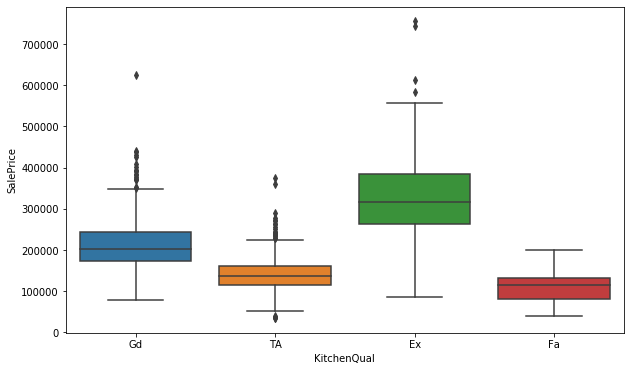

In [19]:
# KitchenQual
f, ax = plt.subplots(figsize=(10,6))
sns.boxplot(y=train_df['SalePrice'], x=train_df['KitchenQual'])
plt.show()

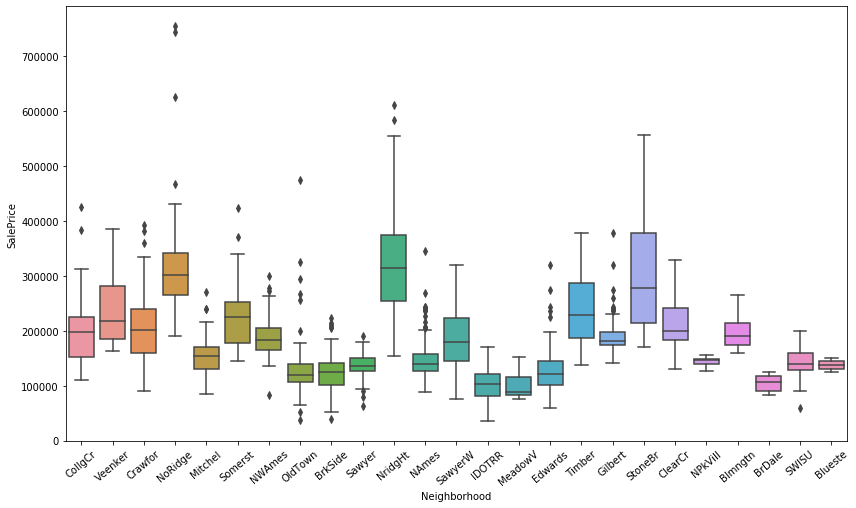

In [20]:
# Neighborhood
f, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(y=train_df['SalePrice'], x=train_df['Neighborhood'])
plt.xticks(rotation=40)
plt.show()

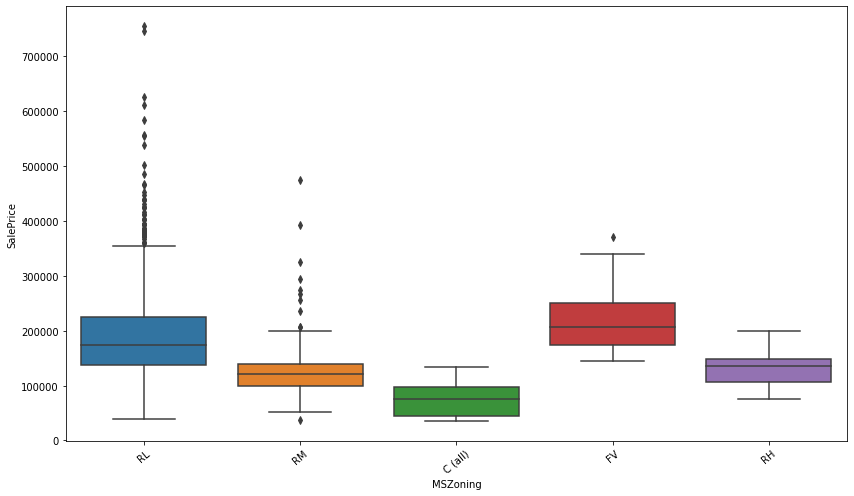

In [22]:
# MSZoning
f, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(y=train_df['SalePrice'], x=train_df['MSZoning'])
plt.xticks(rotation=40)
plt.show()

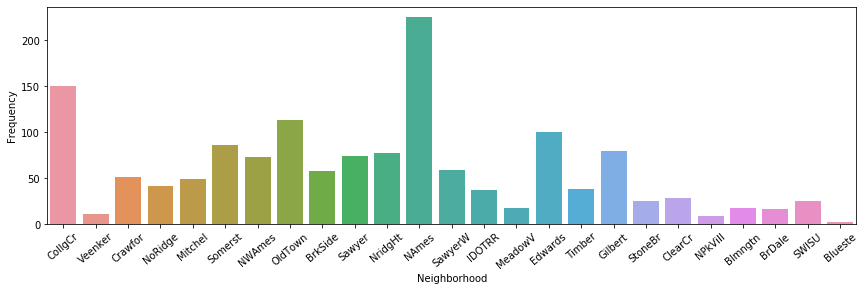

In [23]:
# Count the categories of Neighborhood attribute
f, ax = plt.subplots(figsize=(14.5, 4))
sns.countplot(x=train_df['Neighborhood'])
plt.xticks(rotation=40)
plt.ylabel('Frequency')
plt.show()

#### Missing/null values in categorical columns

In [28]:
train_df[cat_values.columns].isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
BsmtCond          37
MasVnrType         8
Electrical         1
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
dtype: int64

**Notes for Data Cleaning & Preprocessing:**
- assuming for now that missing values means there are no of these elements in the houses thus the value is None
- MasVnrType has the same number of missing values as MasVnrArea which implies 8 houses don't have a masonry veneer

## Data cleaning & Preprocessing

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

### Dealing with missing/null values

In [30]:
train_df_copy = train_df.copy()
# Numerical columns:
train_df_copy['MasVnrArea'] = train_df_copy['MasVnrArea'].fillna(0)
# WHAT TO DO WITH LotFrontage?? Drop missing values or drop the column?
# Categorical columns:
cat_cols_fillnone = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 
                    'FireplaceQu', 'GarageCond', 'GarageQual',
                    'GarageFinish', 'GarageType', 'BsmtFinType2',
                    'BsmtExposure', 'BsmtQual', 'BsmtCond',
                    'BsmtFinType1', 'MasVnrType']

train_df_copy[cat_cols_fillnone] = train_df_copy[cat_cols_fillnone].fillna('None')

In [31]:
# see how many missing values are left
train_df_copy.isnull().sum().sort_values(ascending=False).head()

LotFrontage    259
GarageYrBlt     81
Electrical       1
SalePrice        0
Foundation       0
dtype: int64

### Removing outliers

In [32]:
# removing outliers
train_df_copy = train_df_copy[~(train_df_copy['LotFrontage'] > 300)] 
train_df_copy = train_df_copy[~(train_df_copy['LotArea'] > 100000)]
train_df_copy = train_df_copy[~(train_df_copy['BsmtFinSF1'] > 4000)]
train_df_copy = train_df_copy[~(train_df_copy['TotalBsmtSF'] > 5000)]
train_df_copy = train_df_copy[~(train_df_copy['1stFlrSF'] > 4000)]
train_df_copy = train_df_copy.drop(train_df_copy[
    (train_df_copy['GrLivArea'] > 4000) & 
    (train_df_copy['SalePrice'] < 300000)].index)

print(r'The number of rows after removing outliers: ', 
      train_df_copy.shape[0])

The number of rows after removing outliers:  1453


### Transforming data to reduce skew

In [33]:
# right now only for SalePrice attribute
train_df_copy['SalePrice'] = np.log(train_df_copy['SalePrice'])
train_df_copy = train_df_copy.rename(columns={
    'SalePrice': 'SalePrice_log'})

## Feature Selection & Engineering

Note:
- to a list of excluded attributes I will add TotRmsAbvGrd which is highly correlated with GrLivArea and has lower correlation coefficient.

In [34]:
train_df_copy.shape

(1453, 80)

In [35]:
# removing attributes that were identified when viewing scatterplots 
# and corr values
attributes_drop = ['SalePrice_log', 'MSSubClass', 'LowQualFinSF', 'MiscVal', 'MoSold', 'YrSold', 
                  'GarageArea', '1stFlrSF', 'GarageYrBlt', 'TotRmsAbvGrd']

# imputation of remaining missing values
train_df_copy = train_df_copy.fillna(train_df_copy.median())

X = train_df_copy.drop(attributes_drop, axis=1)

y = train_df_copy['SalePrice_log']

X = pd.get_dummies(X)

# split into training and validation data sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8,
                                                 random_state=0)

## Preliminary Assessment of Machine Learning Algorithms

In [36]:
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [37]:
# the target is log(SalePrice), so it would need to be inversed
# to calculate the score
def inv_y(transformed_y):
    return np.exp(transformed_y)

# create series that will gather mae of models
mae_compare = pd.Series()
mae_compare.index.name = 'Model'

# # Decision Tree
# dt_model = DecisionTreeRegressor(random_state=0)
# dt_model.fit(X_train, y_train)
# dt_val_preds = dt_model.predict(X_val)
# dt_val_mae = mean_absolute_error(inv_y(dt_val_preds), inv_y(y_val))
# mae_compare['DecisionTreeRegressor']= dt_val_mae

# # Random Forest
# rf_model = RandomForestRegressor(random_state=0)
# rf_model.fit(X_train, y_train)
# rf_val_preds = rf_model.predict(X_val)
# rf_val_mae = mean_absolute_error(inv_y(rf_val_preds), inv_y(y_val))
# mae_compare['RandomForestRegressor']= rf_val_mae

# GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, 
                                      max_depth=4, random_state=0)
gb_model.fit(X_train, y_train)
gb_val_preds = gb_model.predict(X_val)
gb_val_mae = mean_absolute_error(inv_y(gb_val_preds), inv_y(y_val))
mae_compare['Gradient Boosting Regressor']= gb_val_mae

# # AdaBoostRegressor
# ab_model = AdaBoostRegressor(n_estimators=300, learning_rate=0.05,
#                         random_state=0)
# ab_model.fit(X_train, y_train)
# ab_val_preds = ab_model.predict(X_val)
# ab_val_mae = mean_absolute_error(inv_y(ab_val_preds), inv_y(y_val))
# mae_compare['AdaBoostRegressor']= ab_val_mae

# # Support Vector Regression
# svr_model = SVR(kernel='linear')
# svr_model.fit(X_train, y_train)
# svr_val_preds = svr_model.predict(X_val)
# svr_val_mae = mean_absolute_error(inv_y(svr_val_preds), inv_y(y_val))
# mae_compare['Support Vector Regression']= svr_val_mae

# # KNeighborsRegressor
# knn_model = KNeighborsRegressor()
# knn_model.fit(X_train, y_train)
# knn_val_preds = knn_model.predict(X_val)
# knn_val_mae = mean_absolute_error(inv_y(knn_val_preds), inv_y(knn_y_val))
# mae_compare['KNeighborsRegressor']= knn_val_mae

# Lasso
lasso_model = Lasso(alpha=0.0005, random_state=0)
lasso_model.fit(X_train, y_train)
lasso_val_preds = lasso_model.predict(X_val)
lasso_val_mae = mean_absolute_error(inv_y(lasso_val_preds), inv_y(y_val))
mae_compare['Lasso'] = lasso_val_mae

# # LinearRegression
# lin_model = LinearRegression()
# lin_model.fit(X_train, y_train)
# lin_val_preds = lin_model.predict(X_val)
# lin_val_mae = mean_absolute_error(inv_y(lin_val_preds), inv_y(y_val))
# mae_compare['LinearRegression']= lin_val_mae

# Ridge
ridge_model = Ridge(random_state=0)
ridge_model.fit(X_train, y_train)
ridge_val_preds = ridge_model.predict(X_val)
ridge_val_mae = mean_absolute_error(inv_y(ridge_val_preds), inv_y(y_val))
mae_compare['Ridge']= ridge_val_mae

# # ElasticNet
# elastic_model = ElasticNet(alpha=0.02, l1_ratio=0.7, random_state=0)
# elastic_model.fit(X_train, y_train)
# elastic_val_preds = elastic_model.predict(X_val)
# elastic_val_mae = mean_absolute_error(inv_y(elastic_val_preds), inv_y(y_val))
# mae_compare['ElasticNet'] = elastic_val_mae

# XGBRegressor
xgb_model = XGBRegressor(n_estimators = 1000, learning_rate=0.05, 
                     random_state=0)
xgb_model.fit(X_train, y_train,
         early_stopping_rounds=5,
         eval_set=[(X_val, y_val)],
         verbose=False)
xgb_val_preds = xgb_model.predict(X_val)
xgb_val_mae = mean_absolute_error(inv_y(xgb_val_preds), inv_y(y_val))
mae_compare['XGB Regressor'] = xgb_val_mae

# display all mae values
print('Summary of MAE values:')
mae_compare.sort_values().round(1)

Summary of MAE values:


Model
Lasso                          13163.7
Ridge                          13241.2
XGB Regressor                  15843.2
Gradient Boosting Regressor    15849.5
dtype: float64

### Cross-validation

In [139]:
from sklearn.model_selection import cross_val_score

cross_val_combined = pd.DataFrame(columns=['MAE', 'Std'], 
index=['Ridge', 'Lasso', 'Gradient Boosting Regressor', 'XGB Regressor'])

# Ridge
ridge_score = cross_val_score(ridge_model, X, y, scoring="neg_mean_absolute_error",
                       cv=10)

ridge_score_mean = -ridge_score.mean().round(4)
ridge_std = ridge_score.std().round(4)
cross_val_combined.loc['Ridge', 'MAE':'Std'] = [ridge_score_mean, ridge_std]

# Lasso
lasso_score = cross_val_score(lasso_model, X, y, scoring="neg_mean_absolute_error",
                       cv=10)

lasso_score_mean = -lasso_score.mean().round(4)
lasso_std = lasso_score.std().round(4)
cross_val_combined.loc['Lasso', 'MAE':'Std'] = [lasso_score_mean, lasso_std]

# Gradient Boosting Regressor
gb_score = cross_val_score(gb_model, X, y, scoring="neg_mean_absolute_error",
                       cv=10)

gb_score_mean = -gb_score.mean().round(4)
gb_std = gb_score.std().round(4)
cross_val_combined.loc['Gradient Boosting Regressor', 'MAE':'Std'] = [gb_score_mean, gb_std]

# XGB Regressor
xgb_score = cross_val_score(xgb_model, X, y, scoring="neg_mean_absolute_error",
                       cv=10)

xgb_score_mean = -xgb_score.mean().round(4)
xgb_std = xgb_score.std().round(4)
cross_val_combined.loc['XGB Regressor', 'MAE':'Std'] = [xgb_score_mean, xgb_std]

cross_val_combined.sort_values(by='MAE')

,MAE,Std
Lasso,0.0765,0.005
Ridge,0.0796,0.0059
XGB Regressor,0.08,0.0086
Gradient Boosting Regressor,0.0825,0.008


## Selecting of Best Algorithm(s) & Fine-Tuning

It seems that lasso and ridge are the best estimators. Let's find the best parameters for them.

### Grid Search

In [177]:
from sklearn.model_selection import GridSearchCV

grid_models = pd.Series()

# Lasso
param_grid = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.02, 0.03, 0.05]}
model = Lasso()

lasso_grid_search = GridSearchCV(model, param_grid, cv=5,
                                scoring='neg_mean_absolute_error').fit(X, y)

grid_models['Lasso'] = lasso_grid_search.best_params_

# Ridge
param_grid = {'alpha': [0.005, 0.02, 0.03, 0.05, 5, 10, 20, 50]}
model = Ridge()

ridge_grid_search = GridSearchCV(model, param_grid, cv=5,
                                scoring='neg_mean_absolute_error').fit(X, y)

grid_models['Ridge'] = ridge_grid_search.best_params_

grid_models

Lasso    {'alpha': 0.0005}
Ridge        {'alpha': 10}
dtype: object

### Load the test data

In [81]:
test_df_path = 'Input/test.csv'
test_df = pd.read_csv(test_df_path, index_col='Id')

### Repeat pre-processing

In [82]:
# perform pre-processing actions on the copy of test_df 
X_test = test_df.copy()

# Imputing the missing values
# Numerical columns:
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(0)
X_test = X_test.fillna(train_df_copy.median())

# Categorical columns:
X_test[cat_cols_fillnone] = X_test[cat_cols_fillnone].fillna('None')

# Repeat dropping of the chosen attributes
if 'SalePrice_log' in attributes_drop:
    attributes_drop.remove('SalePrice_log')
X_test = X_test.drop(attributes_drop, axis=1)

# one-hot encoding
X_test = pd.get_dummies(X_test)

# ensure the test dataset is encoded in the same manner as the train dataset
final_X_train, final_X_test = X.align(X_test, join='left',
                                      axis=1, fill_value=0)

### Create final model

In [83]:
# Create model on full set of data (training & validation)
# Lasso
lasso_final_model = Lasso(alpha=0.0005, random_state=0)
lasso_final_model.fit(final_X_train, y)

# Ridge
ridge_final_model = Ridge(alpha=10, random_state=0)
ridge_final_model.fit(final_X_train, y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=0, solver='auto', tol=0.001)

### Make predictions for submission

In [84]:
# Lasso
lasso_final_preds = lasso_final_model.predict(final_X_test)

output = pd.DataFrame({'Id': test_df.index,
                       'SalePrice': inv_y(lasso_final_preds)})

output.to_csv('Output/lasso_submission.csv', index=False)

# Ridge
ridge_final_preds = ridge_final_model.predict(final_X_test)

output = pd.DataFrame({'Id': test_df.index,
                       'SalePrice': inv_y(ridge_final_preds)})

output.to_csv('Output/ridge_submission.csv', index=False)

## Interpretation

At the end let's take a closer look at the variables that had the biggest impact on the house prices. To do that I will list the features with highest coefficents of the model which gave the best results (in this case it was a lasso model). To make it easy for me to interpret the model, I counted the weighted average of coefficients (and their absolute value) for dummy variables which derived from the same categorical variable.

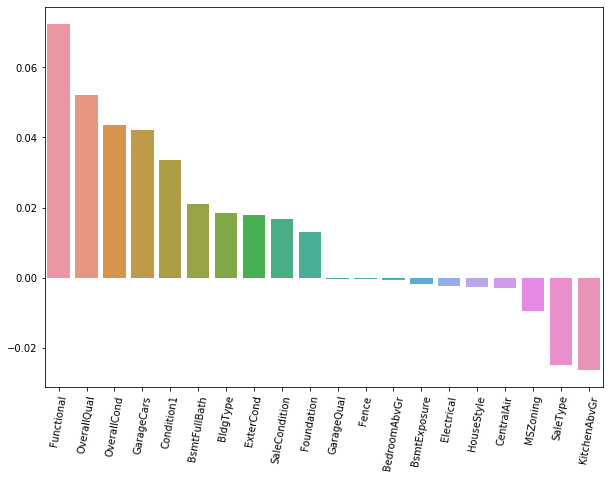

In [85]:
import re

lasso_coefficients = pd.Series(index=final_X_train.columns, data=lasso_final_model.coef_).sort_values(ascending=False)
biggest_lasso_coefficients = pd.concat([lasso_coefficients[:10], lasso_coefficients[-10:]])

# calculating the weighted average of features derived from the same feature
weighted_mean_lasso_coefficients = pd.Series()
for c in cat_values.columns:
    coefficients_of_specific_variables = lasso_coefficients[lasso_coefficients.index.str.startswith(c)]
    list_of_original_categories = [re.split('_', i)[1] for i in coefficients_of_specific_variables.index]
    weights = [sum(train_df[c] == i) for i in list_of_original_categories]
    weighted_mean_lasso_coefficients[c] = np.average(coefficients_of_specific_variables, weights=weights)

# combining the numerical coefficients with categorical
cols_to_drop = [i for i in lasso_coefficients.index for c in weighted_mean_lasso_coefficients.index if i.startswith(c)]
weighted_mean_lasso_coefficients = weighted_mean_lasso_coefficients.append(lasso_coefficients.drop(cols_to_drop))
weighted_mean_lasso_coefficients.sort_values(ascending=False, inplace=True)
biggest_weighted_mean_lasso_coefficients = pd.concat([weighted_mean_lasso_coefficients[:10], weighted_mean_lasso_coefficients[-10:]])

plt.figure(figsize=(10, 7))
sns.barplot(x=biggest_weighted_mean_lasso_coefficients.index, y=biggest_weighted_mean_lasso_coefficients.values)
plt.xticks(rotation=80)
plt.show()

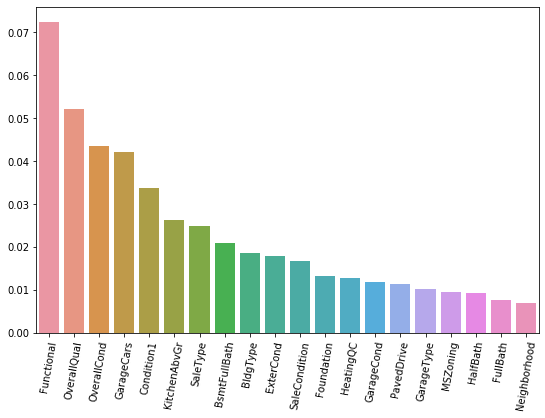

In [86]:
mean_abs_lasso_coefficients = abs(weighted_mean_lasso_coefficients).sort_values(ascending=False)
biggest_mean_abs_lasso_coefficients = mean_abs_lasso_coefficients[:20]

plt.figure(figsize=(9, 6))
sns.barplot(x=biggest_mean_abs_lasso_coefficients.index, y=biggest_mean_abs_lasso_coefficients.values)
plt.xticks(rotation=80)
plt.show()

The model shows that the biggest influence on the price of a house is the condition (functionality) and quality of its workmanship (OverallQual, OverallCond). Slightly less important is the size of the garage, distance from noisy streets, railroads or what type of sale took place (buying the house from the previous owner or from the construction company immediately after construction). 

What is surprising is the relatively low impact on the price of the house of variables determining the location of the house (MSZoning, Neighborhood) and variables determining the number of rooms or area of the house.